<a href="https://colab.research.google.com/github/cmannnn/intro_to_ml/blob/main/build_image_classifier_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# downloading rock paper scissors training and testing datasets
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-12-13 21:05:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.253.122.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   289MB/s    in 0.7s    

2020-12-13 21:05:47 (289 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-12-13 21:05:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 172.217.13.240, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [2]:
# importing training and test data
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_rep = zipfile.ZipFile(local_zip, 'r')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rps-test-set.zip' mode='r'>>

In [3]:
# splitting training set into files

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/paper')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-072.png', 'rock03-025.png', 'rock06ck02-075.png', 'rock07-k03-066.png', 'rock03-000.png', 'rock04-000.png', 'rock03-074.png', 'rock04-110.png', 'rock01-083.png', 'rock06ck02-119.png']
['paper03-062.png', 'paper06-100.png', 'paper04-004.png', 'paper07-073.png', 'paper02-003.png', 'paper04-019.png', 'paper01-114.png', 'paper02-093.png', 'paper02-063.png', 'paper06-108.png']
['paper03-062.png', 'paper06-100.png', 'paper04-004.png', 'paper07-073.png', 'paper02-003.png', 'paper04-019.png', 'paper01-114.png', 'paper02-093.png', 'paper02-063.png', 'paper06-108.png']


/tmp/rps/rock/rock05ck01-072.png


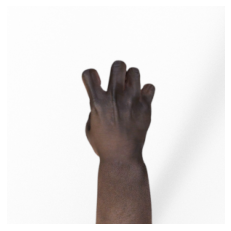

/tmp/rps/rock/rock03-025.png


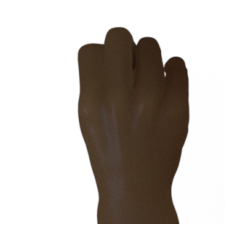

/tmp/rps/paper/paper03-062.png


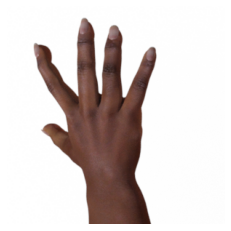

/tmp/rps/paper/paper06-100.png


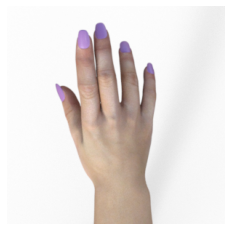

/tmp/rps/paper/paper03-062.png


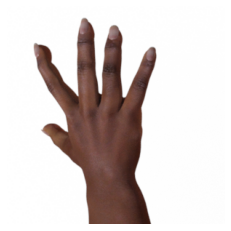

/tmp/rps/paper/paper06-100.png


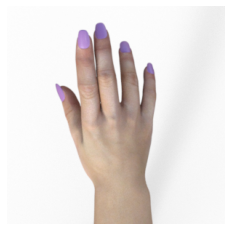

In [4]:
# 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
# generating testing and training data from our datasets

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# training directory
TRAINING_DIR = '/tmp/rps'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

# validation directory
VALIDATION_DIR = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size =126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

# first convolution
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
# second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
# third convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
# fourth convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
# flatten results to DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
# hidden dense layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history = model.fit(train_generator, epochs = 25, steps_per_epoch = 20, validation_data = validation_generator, verbose = 1, validation_steps = 3)

model.save('rps.h5')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

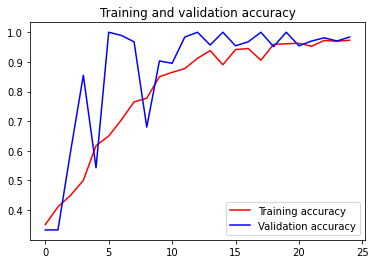

<Figure size 432x288 with 0 Axes>

In [16]:
# graphing training and testing accuracy
# very overfit!
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  for num in classes:
    if num[0] == 1.0:
      print('This is a paper')
    if num[1] == 1.0:
      print('This is a rock')
    if num[2] == 1.0:
      print('This is a scissor')

print(fn)
print(classes)

Saving scissor2.png to scissor2 (4).png
This is a paper
scissor2.png
[[1. 0. 0.]]
